Steps covered in this notebook:
1. Download dataset
2. Data Preparation and Cleaning
3. Exploratory Data Analysis(EDA) and Visualization
4. Asking question about dataset and answer them.
5. Summary and conclusion

**Reference: [Exploratory Data Analysis using Python - A Case Study](https://jovian.ai/aakashns/python-eda-stackoverflow-survey) by Jovian**

## Get Data Ready

- Dataset Used: [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey) on 2020
- Method: Use oepndatasets library to download the prepared dataset into my local folder. Interact with my local folder using os library to import the downloaded dataset.

In [2]:
!pip install opendatasets

In [5]:
import opendatasets as od
od.download("stackoverflow-developer-survey-2020")

94609408it [00:19, 4874774.60it/s]                                                                                     


16384it [00:00, 19325.96it/s]                                                                                          


8192it [00:00, 9013.75it/s]                                                                                            


In [6]:
# check if the data is ready
import os
os.listdir("stackoverflow-developer-survey-2020")

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

survey_data_raw = pd.read_csv("./stackoverflow-developer-survey-2020/survey_results_public.csv")
survey_data_raw

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [12]:
survey_data_raw.shape

(64461, 61)

Contain 66461 rows and 61 columns

In [14]:
survey_data_raw.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

Each columns corresponds to a question in the survey. To know more details about the questions, refer to the scheme file from the same folder.

In [16]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

## Data Preparation & Cleaning
The amount of columns/question in the dataset is too overwhelming. We would like to select 20 columns that we want.

In [17]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [18]:
len(selected_columns)

20

In [45]:
# create a copy of datasets and schemes with the selected 20 columns
survey_df = survey_data_raw[selected_columns].copy()
schema = schema_raw[selected_columns]
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
survey_df.shape

(64461, 20)

In [47]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Observation: Majority of the columns have object as their data types.

Note that some columns have numerical values but they are actually object. Convert them into numeric.

In [48]:
survey_df["Age1stCode"] = pd.to_numeric(survey_df.Age1stCode, errors="coerce")
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors="coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df.YearsCode, errors="coerce")

In [49]:
# converted numerical columns 
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,56784.000000,41151.000000
mean,30.834111,15.476572,12.782051,12.782051,40.782174
std,9.585392,5.114081,9.490657,9.490657,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,6.000000,40.000000
50%,29.000000,15.000000,10.000000,10.000000,40.000000
75%,35.000000,18.000000,17.000000,17.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


Observation: Some error existed within the Age column. Note that the minimum age is 1 while maximum age is 279. Same goes to column WorkWeekHrs with the maximum value of 475 hours.

Let's filter the values in column Age to between 10 and 100 and WordWeekHrs column into <=140 hours (approx 20 hours per day)

In [50]:
survey_df.drop( (survey_df[survey_df.Age < 10]).index, inplace=True )
survey_df.drop( (survey_df[survey_df.Age>100]).index, inplace=True )

survey_df.drop((survey_df[survey_df.WorkWeekHrs>140]).index, inplace=True)

survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,56636.000000,41002.000000
mean,30.832322,15.475317,12.783883,12.783883,40.024395
std,9.505965,5.114952,9.494519,9.494519,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,6.000000,40.000000
50%,29.000000,15.000000,10.000000,10.000000,40.000000
75%,35.000000,18.000000,17.000000,17.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [51]:
survey_df.Gender.value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

Observation: There're many categories of gender. 

Remove values contain more than oen option

In [54]:
survey_df.where( ~(survey_df.Gender.str.contains(";", na=False)), np.nan, inplace=True)


In [55]:
# pick 10 random samples
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
37704,Portugal,25.0,Man,NaN,"Another engineering discipline (such as civil,...",Yes,17.0,8.0,8.0,Bash/Shell/PowerShell;Dart;HTML/CSS;JavaScript...,Bash/Shell/PowerShell;Dart;HTML/CSS;Python;Typ...,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, embedded applic...",40.0,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Fairly important
44384,United Kingdom,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,10.0,20.0,20.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,HTML/CSS;JavaScript;PHP;Python;R;SQL;Swift,Once a year,Play games;Go for a walk or other physical act...,Employed full-time,Data or business analyst;Database administrato...,40.0,Very dissatisfied,Industry that I’d be working in;Flex time or a...,Sometimes: 1-2 days per month but less than we...,Very important
44741,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",No,23.0,7.0,7.0,NaN,NaN,NaN,NaN,Employed full-time,Marketing or sales professional,NaN,NaN,NaN,NaN,Fairly important
36299,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",No,16.0,NaN,NaN,JavaScript,NaN,Every few months,NaN,"Independent contractor, freelancer, or self-em...",Senior executive/VP,60.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Not at all important/not necessary
22785,Ghana,23.0,NaN,NaN,NaN,Yes,22.0,NaN,NaN,C++;HTML/CSS,NaN,NaN,Watch help / tutorial videos,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
29220,Brazil,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,12.0,15.0,15.0,Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...,Bash/Shell/PowerShell;C;Go;HTML/CSS;Java;JavaS...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Neither satisfied nor dissatisfied,Industry that I’d be working in;Remote work op...,Sometimes: 1-2 days per month but less than we...,Fairly important
56364,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,18.0,10.0,10.0,Java;JavaScript;Python,Python;TypeScript,Every few months,Play games;Call a coworker or friend;Go for a ...,Employed full-time,"Developer, back-end;Developer, full-stack",30.0,Very satisfied,Diversity of the company or organization;Flex ...,Never,Critically important
61840,South Korea,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
22586,Serbia,38.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,13.0,20.0,20.0,Bash/Shell/PowerShell;PHP;Python;SQL,Bash/Shell/PowerShell;Python;Scala;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist;...,40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
46568,Nigeria,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",No,32.0,3.0,3.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,Assembly;Dart;Go;HTML/CSS;Java;JavaScript;Kotl...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Designer;Developer, front-end;Developer, mobile",84.0,Very dissatisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Fairly important


## EDA and Visualization

In [56]:
# configure the plot settings
import matplotlib

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

### Country

In [58]:
schema_raw.Country

'Where do you live?'

In [59]:
# the survey involved respondants from 183 countries
survey_df.Country.nunique()

183

In [62]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

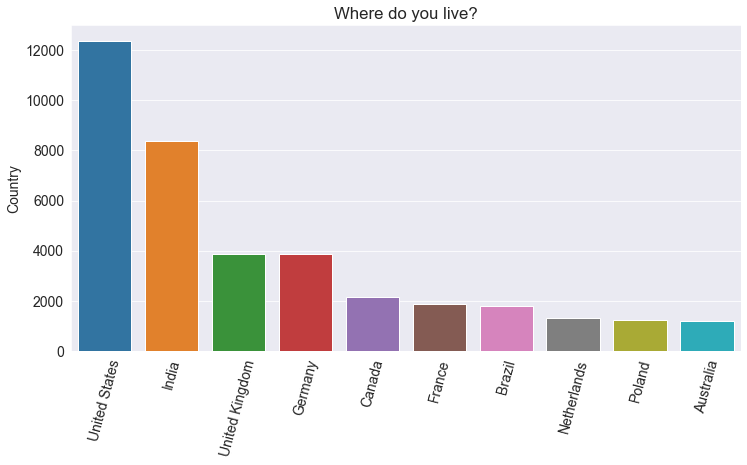

In [64]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

### Age
Plot histogram for respondants of different age ranges

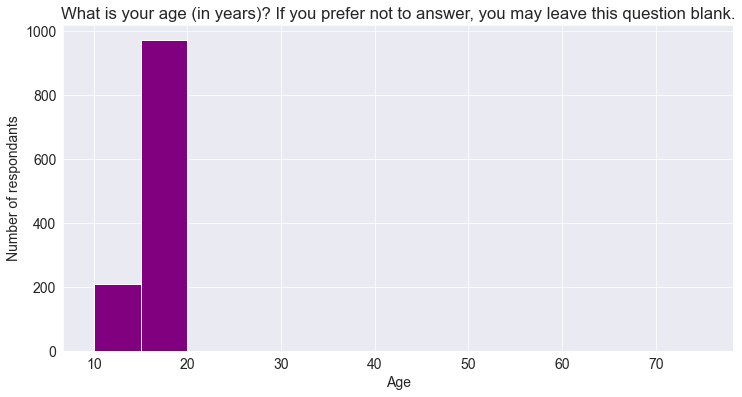

In [75]:
def plot_age_hist(age):
    plt.figure(figsize=(12, 6))
    plt.title(schema.Age)
    plt.xlabel("Age")
    plt.ylabel("Number of respondants")

    plt.hist(age, bins=np.arange(10, 80, 5), color="purple");
    
# 6 age ranges
age_less_than_10 = survey_df[survey_df.Age<10].Age
age_10_to_18 = survey_df[(survey_df.Age>=10) & (survey_df.Age<18)].Age
age_18_to_30  = survey_df[(survey_df.Age>=18)&(survey_df.Age<30)].Age
age_30_to_45  = survey_df[(survey_df.Age>=30)&(survey_df.Age<=45)].Age
age_45_to_60  = survey_df[(survey_df.Age>=45) & (survey_df.Age<60)].Age
age_more_than_60 = survey_df[survey_df.Age>60].Age

# plot it
plot_age_hist(age_10_to_18)

## Gender
Pie chart to show the distribution of gender among respondents

In [76]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [77]:
gender_count = survey_df.Gender.value_counts()
gender_count

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

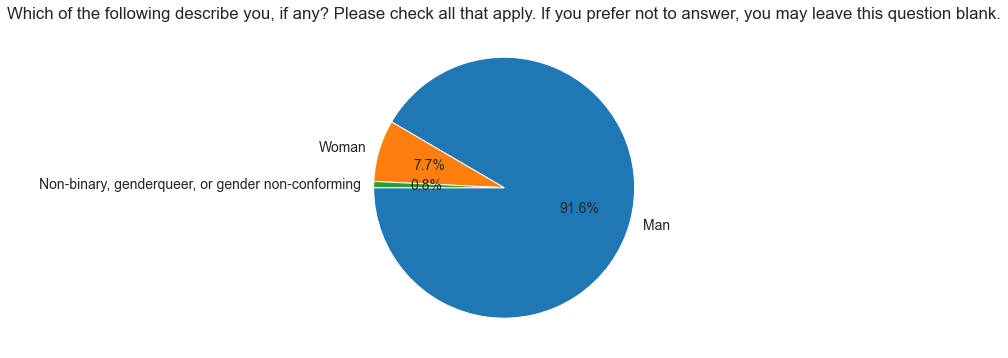

In [80]:
plt.figure(figsize=(12, 6))
plt.title(schema.Gender)
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=180);

## Education Level

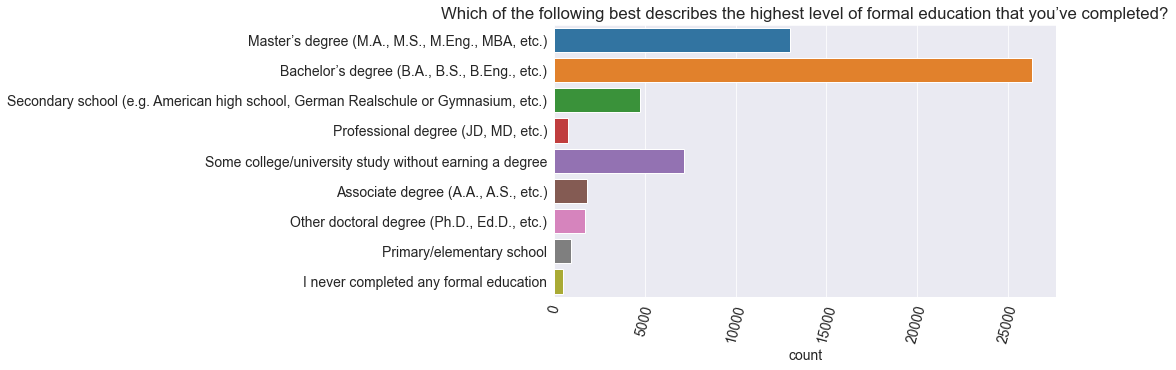

In [82]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema["EdLevel"])
plt.ylabel(None);

## Field of Study

In [83]:
schema.UndergradMajor

'What was your primary field of study?'

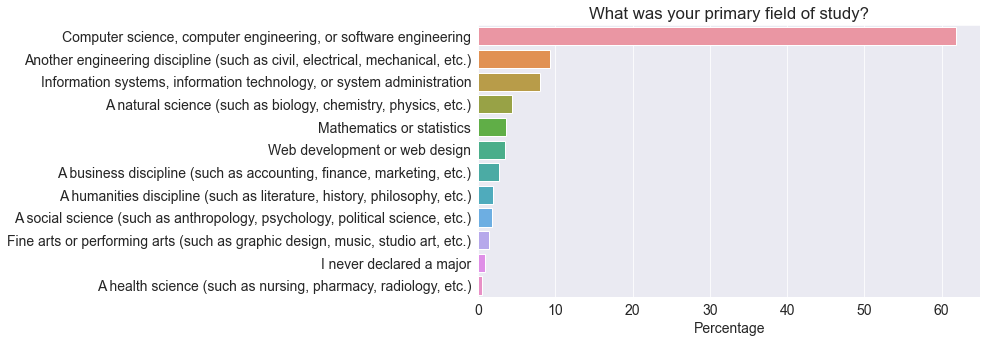

In [85]:
# percentage of developers with diff academic background
undergrad_pct = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel("Percentage");

## Employment

In [86]:
schema.Employment

'Which of the following best describes your current employment status?'

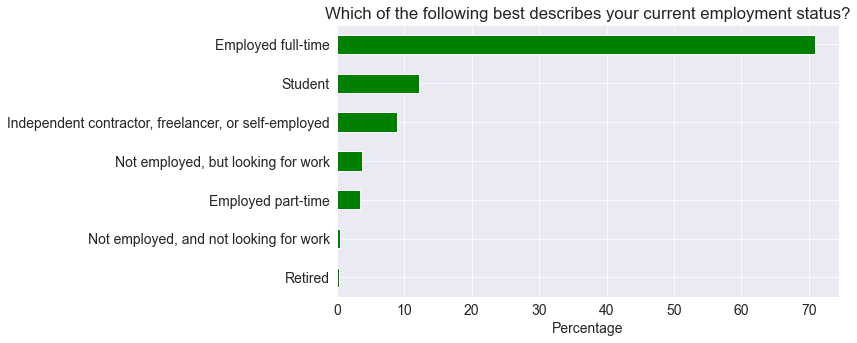

In [87]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind="barh", color="g")
plt.title(schema.Employment)
plt.xlabel("Percentage");

## Developer Types

In [88]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [89]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Observation: The number of unique values is overwhelming. 

Split value that's a list of values into a df with one column

In [94]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    
    # iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # break each value into list of options
        for option in value.split(";"):
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
                
            # mark the value in option column as True
            result_df.at[idx, option] = True
            
    return result_df[options]

In [96]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [98]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

## Asking Questions About the Dataset

Q: Most popular programming languages in 2020?

In [100]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [101]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False)*100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

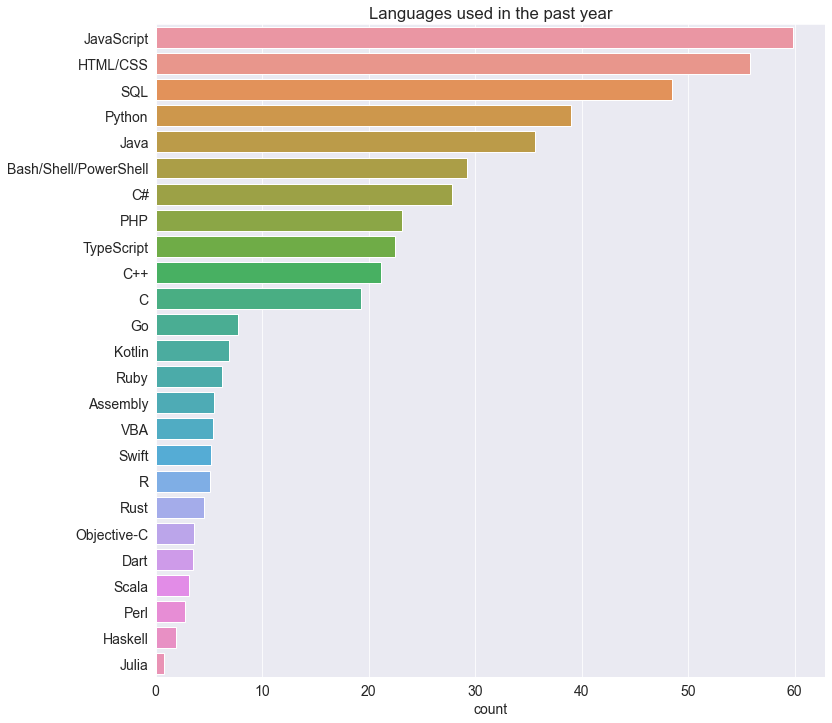

In [103]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year")
plt.xlabel("count");

Q: Which languages are the most people interested to learn over the next year?

In [104]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

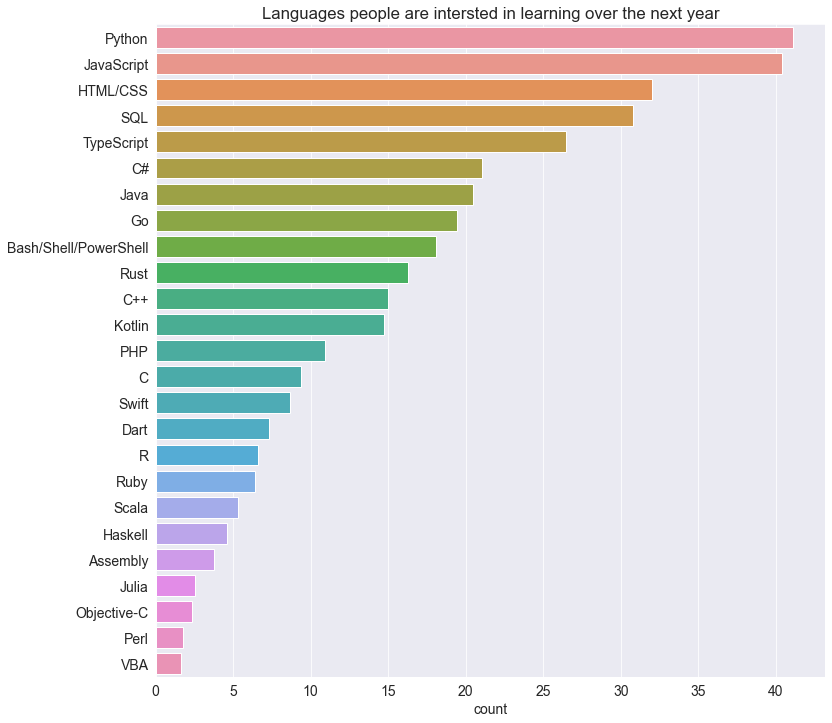

In [105]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Q: Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

- Create a new data frame languages_loved_df that contains a True value for a language only if the corresponding values in languages_worked_df and languages_interested_df are both True
- Take the column-wise sum of languages_loved_df and divide it by the column-wise sum of languages_worked_df to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [106]:
languages_loved_df = languages_worked_df & languages_interested_df

In [107]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

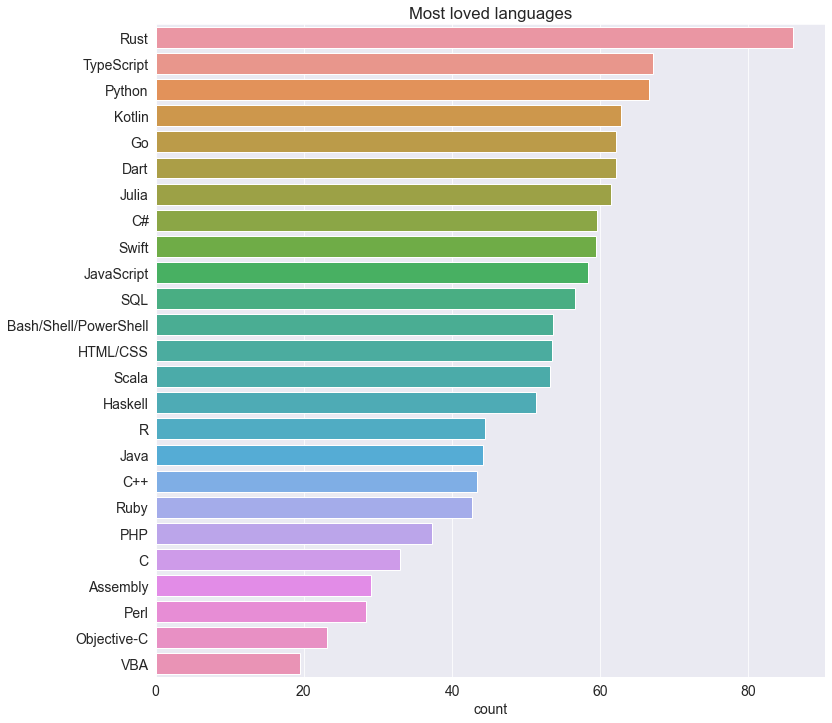

In [108]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [109]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [110]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [111]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


Q: How important is it to start young to build a career in programming?

In [112]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

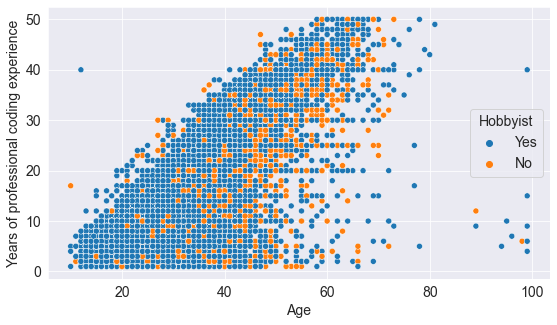

In [113]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

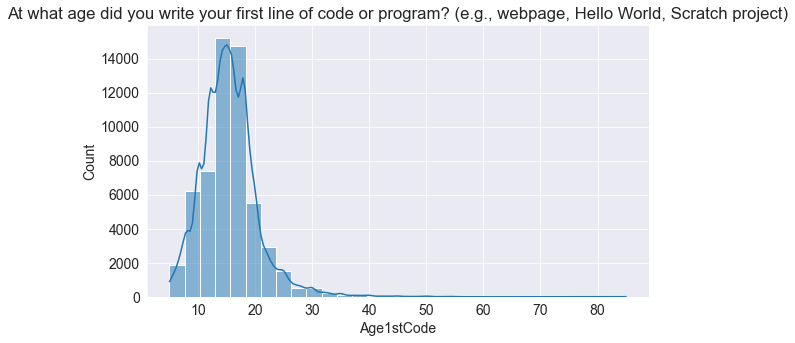

In [114]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);